In [2]:
import math
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, silhouette_samples, silhouette_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
seed = 7
np.random.seed(seed)

In [1]:
import sys,os
os.getcwd()

'C:\\Users\\v-Jaand\\Downloads\\Score\\new_data'

In [24]:
dlist = os.listdir()
dlist

benedict = {}
target_files = [file for file in dlist if file.startswith('TenantDetractors')]

for file in target_files:
    print(file)
    benedict[file] = pd.read_csv(file)

All_Detractors = pd.concat(benedict.values(), ignore_index=True)

All_Detractors = All_Detractors.iloc[:,1:] #Remove extraneous index

All_Detractors.to_csv('DetractorID.csv', index=False)

['.ipynb_checkpoints',
 'AppendDetractors.py',
 'AppendLabel.txt',
 'DetractorClustering.ipynb',
 'DetractorLookup.py',
 'DetractorPrediction.ipynb',
 'DetractorPrediction_Check1.csv',
 'DetractorPrediction_test_Data.csv',
 'ModelPrep.py',
 'ModelPrep_JA2.py',
 'Model_And_Scoring.ipynb',
 'Model_and_ScoringJA3.py',
 'NPSPredictiveModelAttributesTenant_Split_1.csv',
 'NPSPredictiveModelAttributesTenant_Split_1.tsv',
 'NPSPredictiveModelAttributesTenant_Split_2.csv',
 'NPSPredictiveModelAttributesTenant_Split_2.tsv',
 'NPSPredictiveModelAttributesTenant_Split_3.csv',
 'NPSPredictiveModelAttributesTenant_Split_3.tsv',
 'NPSPredictiveModelAttributesTenant_Split_4.tsv',
 'NPSPredictiveModelAttributesTenant_Split_6.tsv',
 'TenantDetractors_Split1.csv',
 'TenantDetractors_Split10.csv',
 'TenantDetractors_Split2.csv',
 'TenantDetractors_Split3.csv',
 'TenantDetractors_Split4.csv',
 'TenantDetractors_Split5.csv',
 'TenantDetractors_Split6.csv',
 'TenantDetractors_Split7.csv',
 'TenantDetractors

In [30]:
#pd.read_csv('DetractorID.csv')

,index,TenantId,Predicted
0,7,79e10169-0854-481c-8fc2-5a3add9baba9,1
1,64,000014e4-3322-4a3f-bb4c-4cd44397bb1e,1
2,68,7f75c9da-15c4-4654-869e-db80c9cca5f9,1
3,197,d4f3eeba-d4a8-472c-b1c0-0393bbbf7757,1
4,204,54d8053b-0a74-4c51-a1ae-19559663a60d,1
5,253,79e14aac-ba34-41e1-b292-57b0cbc04bb8,1
6,286,00005b15-4553-45a8-8efc-569de05e24a4,1
7,335,d4f40ccc-ef19-4c6a-ac98-61d766475f1e,1
8,362,7f760b51-e04f-4db1-99e8-ace886d9999a,1
9,380,7f760de2-ccf3-4a82-9574-6aaa28e900c1,1


I added a faster way to read in all the column names so it does not take up as much space in this notebook:

In [89]:
col_s = open("col_s.txt", "r")
Col_s = col_s.read().replace('\n','').replace('\t','').replace("'","").replace(' ','').split(',')
col_s.close()
Col_s

['TenantId',
 'Name',
 'Country',
 'CountryCode',
 'Region',
 'City',
 'CommunicationLanguage',
 'CommunicationCulture',
 'CreatedDate',
 'CreateDateOfFirstSubscription',
 'PurchaseDateOfFirstNonTrialSubscription',
 'TenantState',
 'TenantType',
 'EXOEnabledUsers',
 'LicensedUsers',
 'LYOEnabledUsers',
 'SPOEnabledUsers',
 'OD4BEnabledUsers',
 'ProPlusEnabledUsers',
 'TotalUsers',
 'EDUSubscriptionsCount',
 'ExchangeSubscriptionsCount',
 'LyncSubscriptionsCount',
 'PaidSubscriptionCount',
 'ProjectSubscriptionsCount',
 'SharePointSubscriptionsCount',
 'TotalSubscriptionCount',
 'TrialSubscriptionCount',
 'VisioSubscriptionsCount',
 'HasEducation',
 'HasCharity',
 'HasGovernment',
 'HasExchange',
 'HasLync',
 'HasSharePoint',
 'HasProPlus',
 'HasYammer',
 'HasSubscription',
 'HasProject',
 'HasPaid',
 'HasVisio',
 'HasTrial',
 'DomainCount',
 'CommerceTenantTagsArray',
 'CommerceTenantTagsCount',
 'AssignedPlanServiceTypeArray',
 'AssignedPlanCount',
 'PartnerTenantCount',
 'Subscriptio

In [90]:
empty_to_zero = open("Emptyto_Zero.txt","r")
Emptyto_Zero = empty_to_zero.read().replace('\n','').replace('\t','').replace("'","").replace(' ','').split(',')
empty_to_zero.close()
Emptyto_Zero

['EXOEnabledUsers',
 'LicensedUsers',
 'LYOEnabledUsers',
 'SPOEnabledUsers',
 'OD4BEnabledUsers',
 'ProPlusEnabledUsers',
 'TotalUsers',
 'EDUSubscriptionsCount',
 'ExchangeSubscriptionsCount',
 'LyncSubscriptionsCount',
 'PaidSubscriptionCount',
 'ProjectSubscriptionsCount',
 'SharePointSubscriptionsCount',
 'TotalSubscriptionCount',
 'TrialSubscriptionCount',
 'VisioSubscriptionsCount',
 'SubscriptionCount',
 'FirstTicketAge',
 'TotalTickets',
 'MinCloseTime',
 'MaxCloseTime',
 'MedCloseTime',
 'DaysToSubEndDate',
 'DaysTicketOpenAfterSubStart',
 'TicketsFeedRecency',
 'NumberOfTickets_Past7Days',
 'NumberOfTickets_Past28Days',
 'NumberOfTickets_Past90Days',
 'NumberOfTickets_Past180Days',
 'NumberOfTickets_Past360Days',
 'PercentOfTickets',
 'TotalTickets1Year',
 'Exchange_unable_to_connect_sync_with_exchange',
 'SharePoint_manage_sites_documents_and_lists',
 'Admin_Get_reports_insights_and_usage_patterns_for_my_Office_365_tenant',
 'Office_Client_Use_Office_apps_including_Mac',
 '

In [44]:
str_to_cat = open("StrTo_Cat.txt","r")
StrTo_Cat = str_to_cat.read().replace('\n','').replace('\t','').replace("'","").replace(' ','').split(',')
str_to_cat.close()
len(StrTo_Cat)


87

In [92]:
def preprocess_tenant_data(data):
    data_s=data.drop(['CommunicationCulture',	'CreatedDate',	'CreateDateOfFirstSubscription',	'PurchaseDateOfFirstNonTrialSubscription',	
    'CommerceTenantTagsArray','AssignedPlanServiceTypeArray','ConciergeInfoIsConceirge',	'ConciergeInfoProgramId',	
    'CompanyLastDirSyncTime',	'PasswordSyncTime','CurrentDefaultDomain','SnapshotTime',	'MSODSTenant_CompanyTags',	
    'MSODSTenant_ExtensionAttributes',	'MSODSTenant_DirSyncEnabled',	'FirstTicketDate',	'LastTicketDate',	'SubscriptionEndDate',	'SubscriptionStartDate',	'Percent_Of_Tickets_Bucket',	
    'LatestFeedbackDateTime',	'Name',	'Country',	'City', 'LastCol', 'DefaultDataLocation'],axis=1)
    
    for x in Emptyto_Zero:
        data_s.loc[data_s[x].isnull(), x] =0

    for x in StrTo_Cat:
        print(x)
        data_s.loc[data_s[x].isnull(), x] ='No_Data'
        data_s[x]= data_s[x].astype('category')


    # for x in StrTo_Cat:
    #     print(x)
    print('data_s tenant count: ', data_s.shape)

    data_s[StrTo_Cat]= data_s[StrTo_Cat].apply(lambda x: x.cat.codes)


    data_s = pd.DataFrame(data_s)
    for i, x in enumerate(StrTo_Cat):
            data_s = pd.concat([data_s, pd.get_dummies(data_s[x], prefix=x, prefix_sep='_',)], axis = 1)
            #drop the original column
            del data_s[x]
            print(i,len(StrTo_Cat)+1)

    #alt_null_fields = [] 
    for x in Emptyto_Zero:
        print(x)
        if '#NULL#' in data_s[x].unique():
            #print(' has alt nulls')
            #alt_null_fields.append(x)
            data_s[x] = data_s[x].replace('#NULL#','0')
        data_s.loc[data_s[x].isnull(), x] =0
        data_s[x]=pd.to_numeric(data_s[x])

    df_log_s = pd.DataFrame(data_s)
    for c in Emptyto_Zero:
        df_log_s[c]=df_log_s[c].apply(lambda x:0 if x <= 0 else math.log(x))

    print(df_log_s.shape)

    df_logMM_s = pd.DataFrame(df_log_s)

    scaler = preprocessing.MinMaxScaler()
    for c in Emptyto_Zero:
        # print(c)
        df_logMM_s[c] = scaler.fit_transform(df_logMM_s[c].values.reshape(-1, 1))
    
    return df_logMM_s

In [24]:

df1.head()

,TenantId,Name,Country,CountryCode,Region,City,CommunicationLanguage,CommunicationCulture,CreatedDate,CreateDateOfFirstSubscription,...,iOSL28Usage_Percent_Desc,IPhoneL28Usage_Percent_Desc,AndroidL28Usage_Percent_Desc,LatestFeedbackDateTime,TotalFeedbacks,LatestSATScore,LatestSATType,CompositeSATScore,CompositeSATType,LastCol
0,79e10169-0854-481c-8fc2-5a3add9baba9,FINTONIC SERVICIOS FINANCIEROS,Spain,ES,Western Europe,MADRID,es,ES-ES,9/11/2017 7:20:32 AM,9/11/2017 2:27:52 PM,...,NOT_USED,NOT_USED,NOT_USED,9/11/2017 7:30:04 AM,1,0,Detractor,0,Detractor,1
1,000014e4-3322-4a3f-bb4c-4cd44397bb1e,のり（株）,Japan,JP,Japan,八戸市,ja,JA-JP,7/8/2018 2:24:07 AM,7/8/2018 9:28:51 AM,...,NOT_USED,NOT_USED,NOT_USED,#NULL#,#NULL#,#NULL#,#NULL#,#NULL#,#NULL#,1
2,7f75c9da-15c4-4654-869e-db80c9cca5f9,BEST WESTERN COURTESY INN,United States,US,United States,EL CAJON,en,EN-US,9/4/2017 6:08:30 PM,9/5/2017 1:08:48 AM,...,NOT_USED,NOT_USED,NOT_USED,#NULL#,#NULL#,#NULL#,#NULL#,#NULL#,#NULL#,1
3,d4f3eeba-d4a8-472c-b1c0-0393bbbf7757,GREEN LIGHT CASTLE LTD.,United Kingdom,GB,UK,NaN,en,EN-GB,1/23/2018 4:39:50 PM,1/24/2018 12:40:05 AM,...,NOT_USED,NOT_USED,NOT_USED,#NULL#,#NULL#,#NULL#,#NULL#,#NULL#,#NULL#,1
4,54d8053b-0a74-4c51-a1ae-19559663a60d,ANGELEC,France,FR,France,RONCQ,fr,FR-FR,8/7/2017 6:06:09 AM,8/7/2017 1:13:26 PM,...,NOT_USED,NOT_USED,NOT_USED,#NULL#,#NULL#,#NULL#,#NULL#,#NULL#,#NULL#,1


In [34]:
df1 = preprocess_tenant_data(df1)

TenantState
TenantType
HasEducation
HasCharity
HasGovernment
HasExchange
HasLync
HasSharePoint
HasProPlus
HasYammer
HasSubscription
HasProject
HasPaid
HasVisio
HasTrial
IsConcierge
DirectoryExtensionsSyncEnabled
DirSyncEnabled
PasswordSyncEnabled
PasswordWriteBackEnabled
IsDonMT
IsViral
IsTest
IsQuickStart
IsFastTrackTenant
HasSKUE3
HasSKUE5
SPOEnvironment
IsRestrictRmsViralSignUp
IsMSODSDeleted
CommunicationLanguage
ConciergeInfoIsManualAdmittance
CPTenant_ChannelName
Age_at_First_Ticket_Bucket
ProjectL7Usage_Percent_Desc
PublisherL7Usage_Percent_Desc
OutlookL7Usage_Percent_Desc
WordL7Usage_Percent_Desc
VisioL7Usage_Percent_Desc
OneNoteL7Usage_Percent_Desc
ExcelL7Usage_Percent_Desc
AccessL7Usage_Percent_Desc
LyncL7Usage_Percent_Desc
PowerPointL7Usage_Percent_Desc
ProjectL14Usage_Percent_Desc
PublisherL14Usage_Percent_Desc
OutlookL14Usage_Percent_Desc
WordL14Usage_Percent_Desc
VisioL14Usage_Percent_Desc
OneNoteL14Usage_Percent_Desc
ExcelL14Usage_Percent_Desc
AccessL14Usage_Percent_Desc

C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


EDUSubscriptionsCount
ExchangeSubscriptionsCount
LyncSubscriptionsCount
PaidSubscriptionCount
ProjectSubscriptionsCount
SharePointSubscriptionsCount
TotalSubscriptionCount
TrialSubscriptionCount
VisioSubscriptionsCount
SubscriptionCount
FirstTicketAge
TotalTickets
MinCloseTime
MaxCloseTime
MedCloseTime
DaysToSubEndDate
DaysTicketOpenAfterSubStart
TicketsFeedRecency
NumberOfTickets_Past7Days
NumberOfTickets_Past28Days
NumberOfTickets_Past90Days
NumberOfTickets_Past180Days
NumberOfTickets_Past360Days
PercentOfTickets
TotalTickets1Year
Exchange_unable_to_connect_sync_with_exchange
SharePoint_manage_sites_documents_and_lists
Admin_Get_reports_insights_and_usage_patterns_for_my_Office_365_tenant
Office_Client_Use_Office_apps_including_Mac
Admin_Find_and_signup_for_the_correct_Office_365_plan
Dynamics_CRM_Setup_and_use_Dynamics_CRM_and_Parature_services
Intune_Download_Setup_and_Use_Intune
OneDrive_Setup_OneDrive_and_sync_my_documents
Admin_Sign_in_and_password_issues
Mobile_Connect_and_conf

C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [ ]:
df1.head()

In [36]:
# df1.to_csv('ScaledDetractorData_Split1.csv', index=False)

In [53]:
# dta2.head()
# dta2.to_csv('FullDetractorData_Split6.csv',index=False)

,TenantId,Name,Country,CountryCode,Region,City,CommunicationLanguage,CommunicationCulture,CreatedDate,CreateDateOfFirstSubscription,...,iOSL28Usage_Percent_Desc,IPhoneL28Usage_Percent_Desc,AndroidL28Usage_Percent_Desc,LatestFeedbackDateTime,TotalFeedbacks,LatestSATScore,LatestSATType,CompositeSATScore,CompositeSATType,LastCol
24,c2e78845-6f83-4c00-b94f-242f3f4eda50,CMB TOTAL IMAGE LTD,United Kingdom,GB,UK,PRESTON,en,EN-GB,6/8/2015 5:21:57 AM,6/8/2015 12:24:27 PM,...,NOT_USED,NOT_USED,NOT_USED,#NULL#,#NULL#,#NULL#,#NULL#,#NULL#,#NULL#,6
30,18ae3496-3f78-401e-a297-7c6776b86381,V DİZAYN KLİMA SİSTEMLERİ SAN. VE TİC. LTD. ŞTİ.,Turkey,TR,MEA,ISTANBUL,tr,TR-TR,3/27/2018 1:28:54 AM,3/27/2018 8:36:08 AM,...,NOT_USED,NOT_USED,NOT_USED,#NULL#,#NULL#,#NULL#,#NULL#,#NULL#,#NULL#,6
69,c2e79f32-0c78-4280-870b-2fe682bf6aba,株式会社メテム,Japan,JP,Japan,中央区,ja,JA-JP,10/2/2014 2:47:58 AM,10/2/2014 9:48:48 AM,...,NOT_USED,NOT_USED,NOT_USED,#NULL#,#NULL#,#NULL#,#NULL#,#NULL#,#NULL#,6
86,edab456e-fea8-47cd-a39e-1145e03b84ff,一般社団法人楽都 本部,Japan,JP,Japan,堺市中区,ja,JA-JP,10/21/2018 8:39:42 PM,10/22/2018 4:30:39 AM,...,NOT_USED,NOT_USED,NOT_USED,#NULL#,#NULL#,#NULL#,#NULL#,#NULL#,#NULL#,6
101,edab4a61-c263-43c5-a940-6601ecf5793a,LUNAR PRODUCTS,South Africa,ZA,MEA,CAPE TOWN,en,EN-ZA,3/15/2016 11:44:59 PM,3/16/2016 6:45:04 AM,...,NOT_USED,NOT_USED,NOT_USED,#NULL#,#NULL#,#NULL#,#NULL#,#NULL#,#NULL#,6


In [3]:
df1 = pd.read_csv('ScaledDetractorData_Split1.csv')
#df1num = df1.loc[:,df1.dtypes == float]

In [23]:
df1.tail()

,TenantId,EXOEnabledUsers,LicensedUsers,LYOEnabledUsers,SPOEnabledUsers,OD4BEnabledUsers,ProPlusEnabledUsers,TotalUsers,EDUSubscriptionsCount,ExchangeSubscriptionsCount,...,Region_6,Region_7,Region_8,Region_9,Region_10,Region_11,Region_12,O365TenantReleaseTrack_0,O365TenantReleaseTrack_1,O365TenantReleaseTrack_2
19576,04448abe-a75a-4c5f-8d4c-b59484291173,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.215062,0.0,0.0,...,1,0,0,0,0,0,0,0,1,0
19577,7e24fe38-8a2d-462a-a07b-47c8b4e14496,0.628867,0.359574,0.645095,0.353417,0.353417,0.353417,0.386357,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
19578,ae6aea19-b015-4a32-9719-89c0391dd70e,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
19579,04449973-c744-421d-92ff-513327ad65f8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083198,0.0,0.0,...,0,0,0,0,0,1,0,0,1,0
19580,0444a1c4-d1d5-419e-9264-bfe246b88516,0.000000,0.083198,0.000000,0.083198,0.083198,0.083198,0.131865,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0


In [4]:
tenants = df1.TenantId
df1 = df1.drop('TenantId',axis=1)
df1.tail()

,EXOEnabledUsers,LicensedUsers,LYOEnabledUsers,SPOEnabledUsers,OD4BEnabledUsers,ProPlusEnabledUsers,TotalUsers,EDUSubscriptionsCount,ExchangeSubscriptionsCount,LyncSubscriptionsCount,...,Region_6,Region_7,Region_8,Region_9,Region_10,Region_11,Region_12,O365TenantReleaseTrack_0,O365TenantReleaseTrack_1,O365TenantReleaseTrack_2
19576,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.215062,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,1,0
19577,0.628867,0.359574,0.645095,0.353417,0.353417,0.353417,0.386357,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
19578,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,1,0
19579,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083198,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,1,0
19580,0.000000,0.083198,0.000000,0.083198,0.083198,0.083198,0.131865,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0


# Clustering Comparisons

In [5]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Below is a useful overview of the clustering methods available to us, and their comparitive advantages. 
* Birch seems promising for the magnitude of data we have, but for now I will stick to more familiar algorithms. 

# Principal Components

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=100, svd_solver='full')
pca.fit(df1)    

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [12]:
pca.explained_variance_ratio_

array([0.1152957 , 0.09598739, 0.07344721, 0.05358271, 0.03919249,
       0.03757789, 0.03556529, 0.03038131, 0.02745058, 0.02383604,
       0.02157205, 0.01827215, 0.01599787, 0.01557765, 0.01500338,
       0.01467989, 0.01345131, 0.01217329, 0.01144863, 0.01098164,
       0.01083864, 0.01059359, 0.00974026, 0.00920573, 0.00893732,
       0.00874606, 0.00833102, 0.00822372, 0.00751566, 0.00741522,
       0.00728536, 0.00705591, 0.00698496, 0.0064513 , 0.00610282,
       0.00599389, 0.00582202, 0.00562738, 0.00533707, 0.00483591,
       0.00465655, 0.00459962, 0.00440837, 0.00420103, 0.00401138,
       0.00389059, 0.00376798, 0.00366835, 0.00346256, 0.00334963,
       0.00325753, 0.00308621, 0.00300186, 0.00293994, 0.0027802 ,
       0.00275636, 0.00268312, 0.00248358, 0.00244909, 0.00235999,
       0.00221201, 0.00219483, 0.00216907, 0.00213087, 0.00206048,
       0.00187368, 0.00183556, 0.00174851, 0.00173822, 0.00165285,
       0.00160237, 0.00157996, 0.00154966, 0.00153469, 0.00152

It takes many features to fully explain the variance of this dataset. 

In [8]:
pca = PCA(n_components=2, svd_solver='full')
Y_pca = pca.fit_transform(df1)

We can plot the first two Principal Components of the Detractor dataset to visualize the data. 

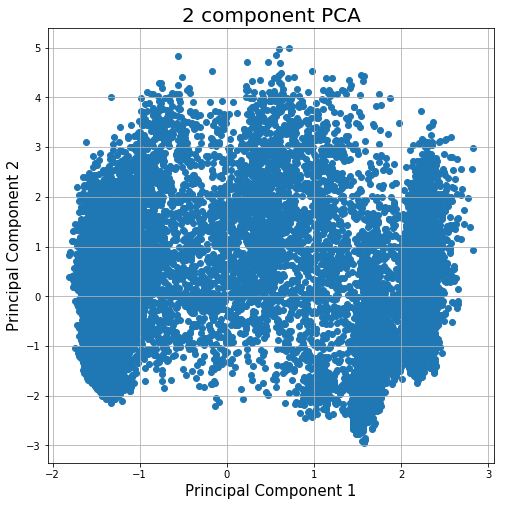

In [22]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(Y_pca[:,0],Y_pca[:,1])
ax.grid()

# KMeans

In [6]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools

For KMeans Clustering, we can use the elbow plot (i.e. a plot displaying the diminishing returns for additional clusters) above to determine a good cutoff for the number of clusters. The less steep the lines get from point to point, the less useful each additional cluster will be. 

2 clusters
3 clusters
4 clusters
5 clusters
6 clusters
7 clusters
8 clusters
9 clusters
10 clusters


<Figure size 640x480 with 0 Axes>

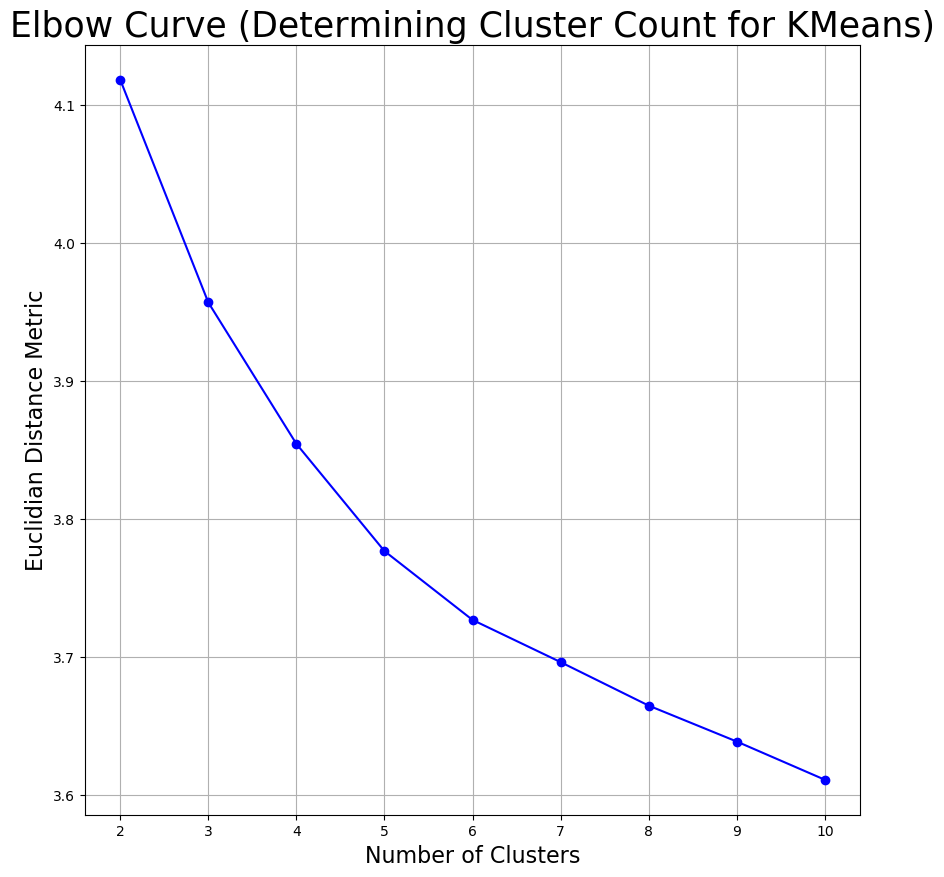

In [17]:
def elbow_curve(x):
    res = list()
    n_cluster = range(2,11)
    for n in n_cluster:
        print(n, 'clusters')
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(x)
        k_labels = pd.Series(kmeans.labels_)
        #print(k_labels.value_counts())
        res.append(np.average(np.min(cdist(x, kmeans.cluster_centers_, 'euclidean'), axis=1)))

    plt.rcdefaults()
    plt.gray()
    fig, ax = plt.subplots(figsize=(10,10))
    ax.plot(n_cluster, res, 'o-',c='b', label='')


    plt.xlabel('Number of Clusters',fontsize=16)
    plt.ylabel('Euclidian Distance Metric',fontsize=16)

    plt.grid()
    plt.title('Elbow Curve (Determining Cluster Count for KMeans)',fontsize=25)
    plt.show()
    
elbow_curve(df1)

From the Elbow Curve above, it seems like we'd use no more than 6 clusters seems optimal for the data.

We will use the two most important standardized features for splits, according to a Random Forest model on Append Label Data (See ModelTuning Notebook)

In [23]:
colors = ['red','blue','yellow','black','purple','lime']

2  Clusters
0    11002
1     8579
dtype: int64
3  Clusters
0    10898
2     5573
1     3110
dtype: int64
4  Clusters
2    8941
0    4179
1    3583
3    2878
dtype: int64
5  Clusters
2    5755
3    4073
1    4001
0    2884
4    2868
dtype: int64
6  Clusters
5    3985
4    3955
2    3499
1    2926
3    2852
0    2364
dtype: int64


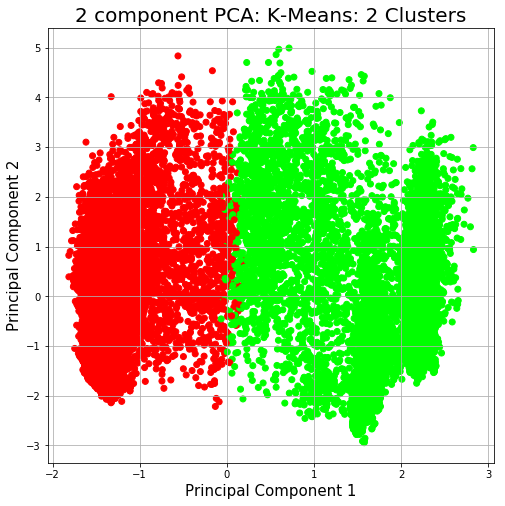

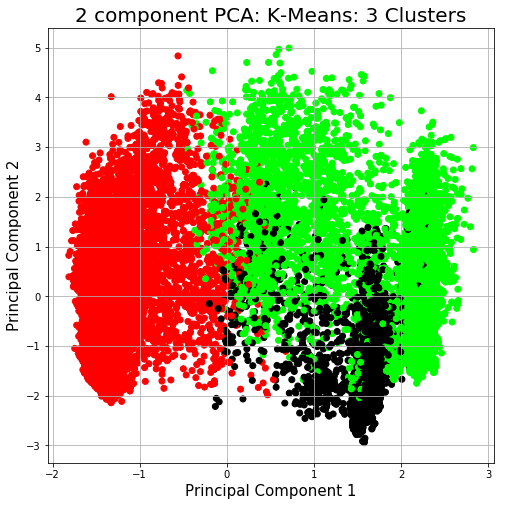

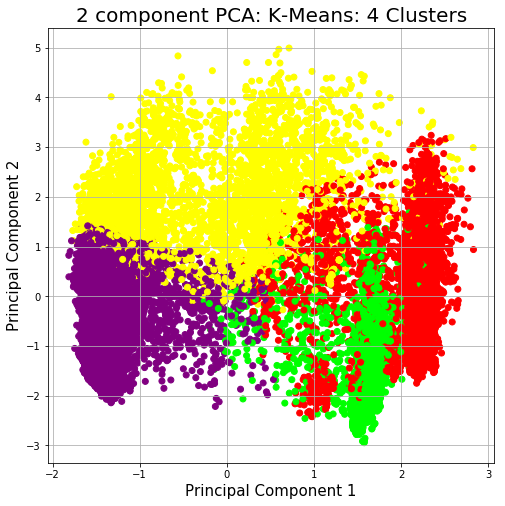

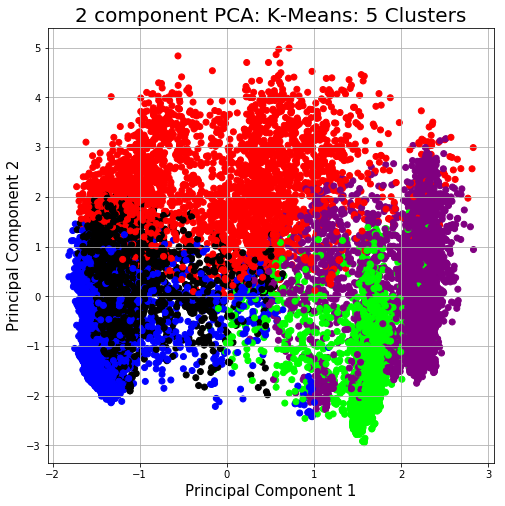

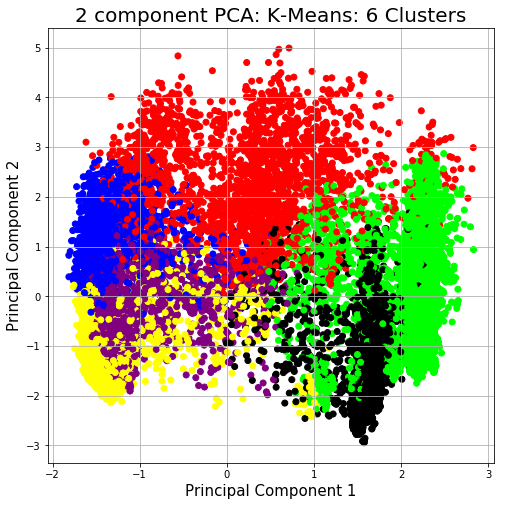

In [24]:
for i in range(2,7):
    print(i,' Clusters')
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df1)
    k_labels = pd.Series(kmeans.labels_)
    print(k_labels.value_counts())
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA: K-Means: '+str(i)+' Clusters', fontsize = 20)
    ax.scatter(Y_pca[:,0],Y_pca[:,1], c=k_labels, cmap=matplotlib.colors.ListedColormap(colors))
    ax.grid()
    plt.show()

In [ ]:
#silhouette score
#more definitive than elbow
#between -1 and 1
#average silhoutte score of all the points
#closest average score to 1 across all points is the best

In [25]:
x = df1.AssignedPlanCount
y = df1.TotalUsers

In [ ]:
def get_silhouette_score(nclust):
    km = KMeans(nclust)
    km.fit(df1)
    sil_avg = silhouette_score(df1, km.labels_)
    return sil_avg
sil_scores = [get_silhouette_score(i) for i in range(2,6)]

Text(0.5,1,'Silhouette Score vs K')

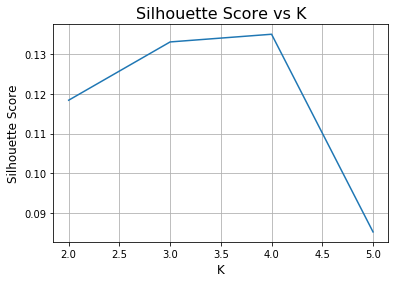

In [13]:
plt.grid()
plt.plot(range(2,6), sil_scores)
plt.xlabel('K',fontsize=12)
plt.ylabel('Silhouette Score',fontsize=12)
plt.title('Silhouette Score vs K',fontsize=16)

In [10]:
!pip install helper

ImportError: cannot import name 'cluster_and_plot' from 'helper' (C:\Users\v-Jaand\AppData\Local\Continuum\anaconda3\lib\site-packages\helper\__init__.py)

2  Clusters


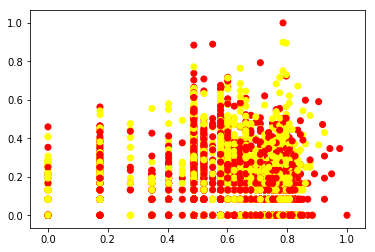

3  Clusters


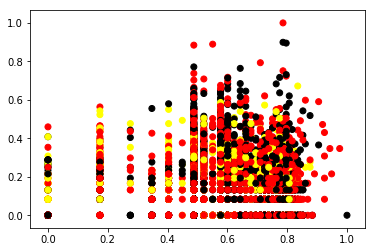

4  Clusters


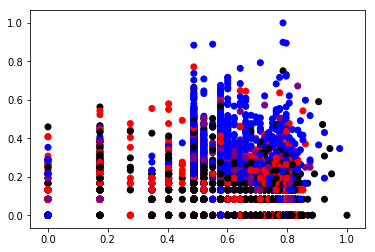

5  Clusters


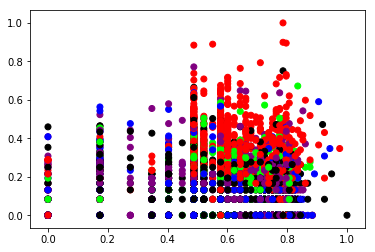

6  Clusters


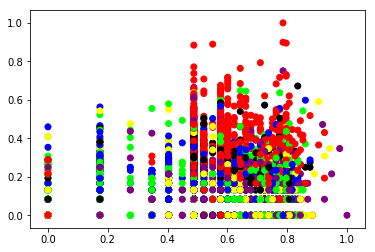

In [26]:
for i in range(2,7):
    print(i,' Clusters')
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df1)
    k_labels = pd.Series(kmeans.labels_)
    plt.scatter(x,y, c=k_labels, cmap=matplotlib.colors.ListedColormap(colors[:i+1]))
    plt.show()

Based on these sketches, the concentration of blue labels around the greater values of these two variables in K=4 makes that seem like a reasonable value. We can also cluster using different features, or principal components. 

In [27]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(df1)
k_labels = pd.Series(kmeans.labels_)

# Agglomerative/Hierarchical

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
Z = linkage(df1, method='average')

The dendogram is another visualization for determining cutoff for clusters.

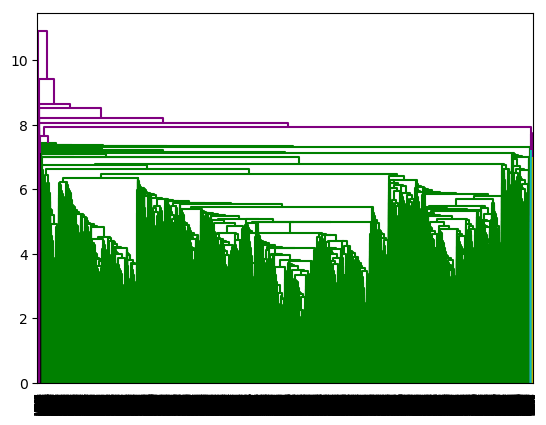

In [75]:
 dendo = dendrogram(Z, show_leaf_counts=False, above_threshold_color='purple')

Near Y=8, there is a noticably wide split.

The algorithm from Scipy determines a horizontal cutoff just a bit below that line; counting all the bracket splits above the horizontal cutoff point, there are an estimated 10 clusters to work with.

In [71]:
hclust = AgglomerativeClustering(n_clusters=10).fit(df1)
h_labels = pd.Series(hclust.labels_)

In [74]:
h_labels.value_counts()

2    3508
3    3035
5    2702
6    2453
4    2028
1    1652
7    1573
9    1102
8     854
0     674
dtype: int64

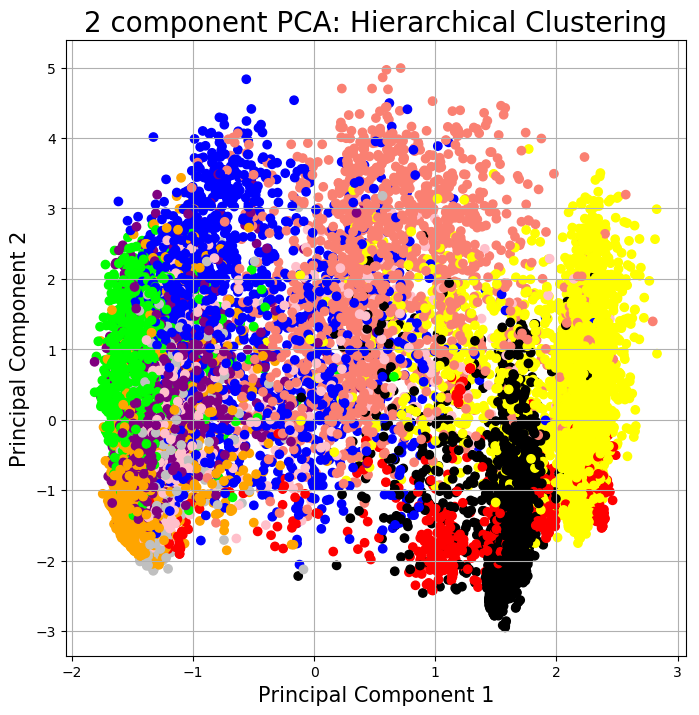

In [125]:
colors = ['red','blue','yellow','purple','lime','black','orange','salmon','silver','pink']
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA: Hierarchical Clustering', fontsize = 20)
ax.scatter(Y_pca[:,0],Y_pca[:,1], c=h_labels, cmap=matplotlib.colors.ListedColormap(colors))
ax.grid()

# Gaussian Mixed Clustering

In [97]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components = 4, 
                              covariance_type='full')
gmm.fit(df1)
gmm_clusters = gmm.predict(df1)

In [129]:
gmm_clusters = pd.Series(gmm_clusters)
gmm_clusters.unique()

array([2, 3, 0, 1], dtype=int64)

Gaussian Mixed Model Clustering is similar to KMeans, except that it allows for mixed membership of observations. It estimates the probability of an observation belonging to a cluster rather than classifying by distance.

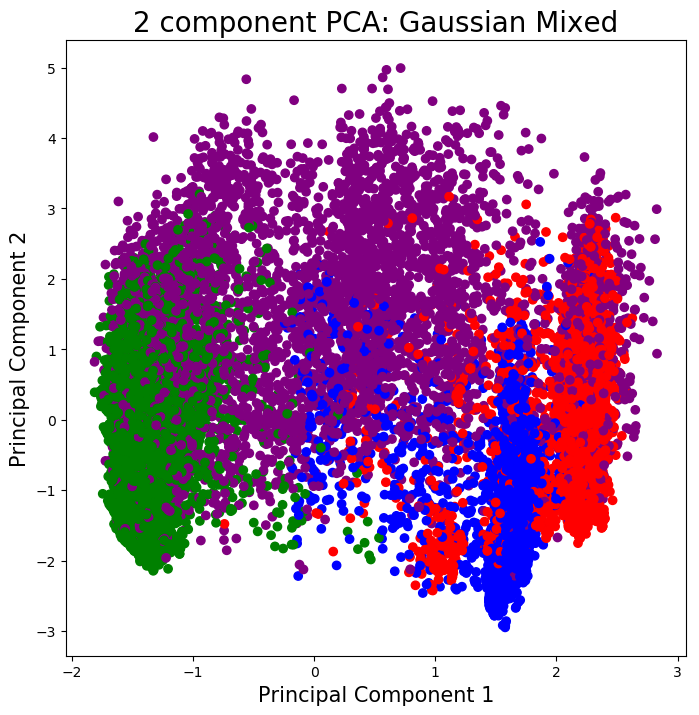

In [128]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA: Gaussian Mixed', fontsize = 20)
plt.scatter(Y_pca[:,0],Y_pca[:,1],c=gmm_clusters, cmap=matplotlib.colors.ListedColormap(colors))

# Appending to Data:

Moving forward with K=4 Clusters

In [ ]:
df_1 = pd.read_csv('FullDetractorData_Split1.csv')

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(df1)
k_labels = pd.Series(kmeans.labels_)
print(k_labels.value_counts())
df_1['k_label'] = k_labels

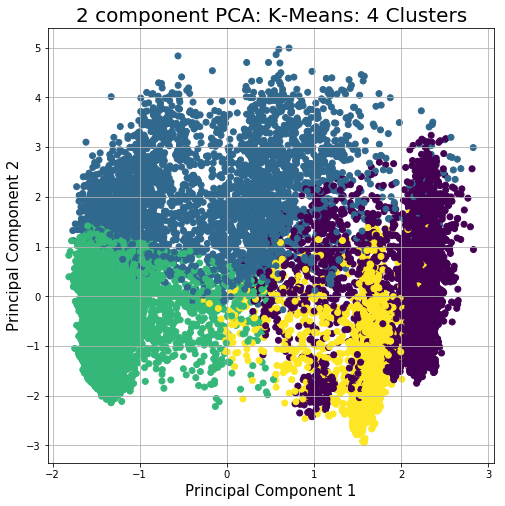

In [17]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA: K-Means: '+str(4)+' Clusters', fontsize = 20)
ax.scatter(Y_pca[:,0],Y_pca[:,1], c=k_labels)
ax.grid()
plt.show()

In [40]:
Y_pca_k[Y_pca_k[:,2]==1]

array([[-0.46853745,  2.86190231,  1.        ],
       [ 0.29609685,  2.60484723,  1.        ],
       [ 0.99312046,  3.18761277,  1.        ],
       ...,
       [ 0.56422211,  3.1789004 ,  1.        ],
       [-0.3771888 ,  3.36327139,  1.        ],
       [ 0.14206512,  2.10980238,  1.        ]])

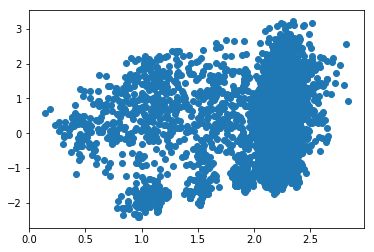

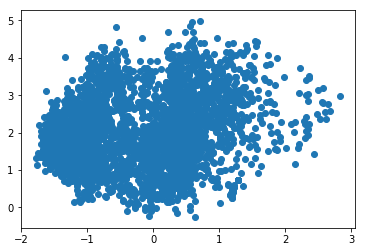

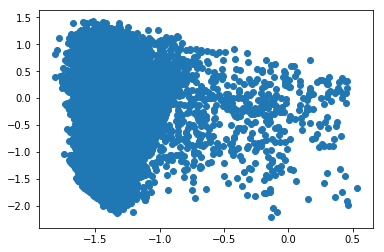

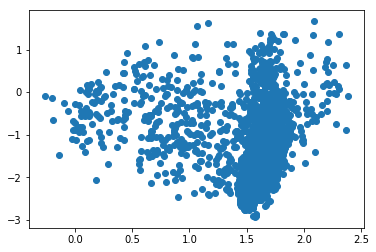

In [43]:
for i in range(4):
    Y_pca_k = np.column_stack([Y_pca,k_labels])
    Y_pca_k = Y_pca_k[Y_pca_k[:,2]==i]
    plt.scatter(Y_pca_k[:,0],Y_pca_k[:,1])
    plt.show()

## Summarizing Distances in Clusters:

In [51]:
cluster_dict = {}
for i, cluster in enumerate(sorted(df_1.k_label.unique()):
    cluster_dict['Cluster_'+str(i+1)] = df_1[df_1.k_label==cluster]

In [50]:
cluster_dict['Cluster_0']

,TenantId,Name,Country,CountryCode,Region,City,CommunicationLanguage,CommunicationCulture,CreatedDate,CreateDateOfFirstSubscription,...,IPhoneL28Usage_Percent_Desc,AndroidL28Usage_Percent_Desc,LatestFeedbackDateTime,TotalFeedbacks,LatestSATScore,LatestSATType,CompositeSATScore,CompositeSATType,LastCol,k_label
0,79e10169-0854-481c-8fc2-5a3add9baba9,FINTONIC SERVICIOS FINANCIEROS,Spain,ES,Western Europe,MADRID,es,ES-ES,9/11/2017 7:20:32 AM,9/11/2017 2:27:52 PM,...,NOT_USED,NOT_USED,9/11/2017 7:30:04 AM,1,0,Detractor,0,Detractor,1,1
9,7f760de2-ccf3-4a82-9574-6aaa28e900c1,DISCO MACHINE & MFG.,United States,US,United States,NORRIDGE,en,EN-US,9/14/2015 12:02:19 PM,9/14/2015 7:06:54 PM,...,NOT_USED,NOT_USED,#NULL#,#NULL#,#NULL#,#NULL#,#NULL#,#NULL#,1,1
10,7f76110b-a3ff-4f90-8071-b1ad40c3fb57,株式会社 中旺ヘルス,Japan,JP,Japan,清須市,ja,JA-JP,2/3/2015 10:56:27 PM,2/4/2015 12:00:00 AM,...,NOT_USED,NOT_USED,#NULL#,#NULL#,#NULL#,#NULL#,#NULL#,#NULL#,1,1
12,d4f4292e-ed8a-46d9-b3bb-fe1fe539657f,GLEIE & METZNER VERMITTLUNG ÄRZTLICHER DIENSTE...,Germany,DE,Germany,KAMENZ,de,DE-DE,7/28/2017 3:55:40 AM,7/28/2017 10:56:00 AM,...,NOT_USED,Less_than_25Pct,#NULL#,#NULL#,#NULL#,#NULL#,#NULL#,#NULL#,1,1
14,54d84662-7f5f-451d-b70c-07567a718d63,TRANSPORTS OBERSON,France,FR,France,MOIRANS-EN-MONTAGNE,en,FR-FR,8/22/2018 8:32:51 AM,8/22/2018 3:33:16 PM,...,NOT_USED,NOT_USED,#NULL#,#NULL#,#NULL#,#NULL#,#NULL#,#NULL#,1,1
16,aa23f97c-ed61-4fd7-884d-1d2b4689c359,IBERICA DE MANGUERAS THOR#TAB# S.L.,Spain,ES,Western Europe,CERVELLO,EN,EN-US,10/17/2018 12:41:12 AM,10/17/2018 7:42:33 AM,...,NOT_USED,NOT_USED,#NULL#,#NULL#,#NULL#,#NULL#,#NULL#,#NULL#,1,1
25,54d8b54a-0c2b-41a4-96c8-e02a215b5a11,EHPAD LA CHOCOLATIÈRE,France,FR,France,NOISIEL,fr,FR-FR,4/30/2018 12:31:05 AM,4/30/2018 7:31:23 AM,...,NOT_USED,NOT_USED,#NULL#,#NULL#,#NULL#,#NULL#,#NULL#,#NULL#,1,1
45,d4f65263-8b23-45ca-b8cf-44675d84e374,RVCCU,United States,US,United States,ROANOKE,EN,EN-US,12/14/2016 8:14:05 AM,12/14/2016 4:14:20 PM,...,NOT_USED,NOT_USED,#NULL#,#NULL#,#NULL#,#NULL#,#NULL#,#NULL#,1,1
48,54da9ea5-85f5-4547-8d76-80e4721caa70,APLUS,France,FR,France,MONTPELLIER,fr,FR-FR,10/20/2016 8:28:54 AM,10/20/2016 3:37:07 PM,...,NOT_USED,NOT_USED,#NULL#,#NULL#,#NULL#,#NULL#,#NULL#,#NULL#,1,1
50,7f78780e-ef3e-4da2-9098-8b53728c2f10,AYESA SP. Z O.O.,Poland,PL,Central and Eastern Europe,RUDA ŚLĄSKA,PL,PL-PL,10/24/2017 2:27:03 AM,10/24/2017 9:27:24 AM,...,NOT_USED,NOT_USED,#NULL#,#NULL#,#NULL#,#NULL#,#NULL#,#NULL#,1,1


In [52]:
distributions = pd.DataFrame()
for key in cluster_dict.keys():
    distributions[key] = cluster_dict[key].nunique()

In [55]:
distributions.to_csv('cluster_counts.csv')

In [100]:
df_1.k_label.mode()

0    2
dtype: int32

In [108]:
modes = df_1.groupby(['k_label'])[StrTo_Cat].apply(pd.DataFrame.mode)


In [110]:
modes.nunique()

TenantState                        1
TenantType                         1
HasEducation                       1
HasCharity                         1
HasGovernment                      1
HasExchange                        1
HasLync                            1
HasSharePoint                      1
HasProPlus                         1
HasYammer                          1
HasSubscription                    1
HasProject                         1
HasPaid                            1
HasVisio                           1
HasTrial                           1
IsConcierge                        1
DirectoryExtensionsSyncEnabled     1
DirSyncEnabled                     1
PasswordSyncEnabled                1
PasswordWriteBackEnabled           1
IsDonMT                            1
IsViral                            1
IsTest                             1
IsQuickStart                       1
IsFastTrackTenant                  1
HasSKUE3                           1
HasSKUE5                           1
S

In [124]:
same_per_cluster = modes.columns[modes.nunique()==1] #Filter by Categories with differences between clusters
modes.drop(same_per_cluster,axis=1,inplace=True)

In [126]:
modes

,,ConciergeInfoIsManualAdmittance,OutlookL7Usage_Percent_Desc,WordL7Usage_Percent_Desc,ExcelL7Usage_Percent_Desc,OutlookL14Usage_Percent_Desc,WordL14Usage_Percent_Desc,ExcelL14Usage_Percent_Desc,PowerPointL14Usage_Percent_Desc,OutlookL28Usage_Percent_Desc,WordL28Usage_Percent_Desc,...,PowerPointL28Usage_Percent_Desc,Win10L7Usage_Percent_Desc,WinOtherL7Usage_Percent_Desc,MacL7Usage_Percent_Desc,Win10L14Usage_Percent_Desc,WinOtherL14Usage_Percent_Desc,MacL14Usage_Percent_Desc,Win10L28Usage_Percent_Desc,WinOtherL28Usage_Percent_Desc,MacL28Usage_Percent_Desc
k_label,,,,,,,,,,,,,,,,,,,,,,
0,0,True,NOT_USED,NOT_USED,75Pct_or_more,NOT_USED,Less_than_25Pct,75Pct_or_more,NOT_USED,NOT_USED,Less_than_25Pct,...,NOT_USED,NOT_USED,75Pct_or_more,NOT_USED,NOT_USED,75Pct_or_more,NOT_USED,NOT_USED,75Pct_or_more,NOT_USED
1,0,True,Less_than_25Pct,25_50Pct,50_75Pct,Less_than_25Pct,25_50Pct,50_75Pct,Less_than_25Pct,Less_than_25Pct,25_50Pct,...,Less_than_25Pct,75Pct_or_more,NOT_USED,NOT_USED,75Pct_or_more,Less_than_25Pct,NOT_USED,75Pct_or_more,Less_than_25Pct,NOT_USED
2,0,False,NOT_USED,NOT_USED,75Pct_or_more,NOT_USED,Less_than_25Pct,75Pct_or_more,NOT_USED,NOT_USED,Less_than_25Pct,...,NOT_USED,75Pct_or_more,NOT_USED,NOT_USED,75Pct_or_more,NOT_USED,NOT_USED,75Pct_or_more,NOT_USED,NOT_USED
3,0,False,NOT_USED,NOT_USED,75Pct_or_more,NOT_USED,25_50Pct,50_75Pct,NOT_USED,NOT_USED,25_50Pct,...,NOT_USED,NOT_USED,NOT_USED,75Pct_or_more,NOT_USED,NOT_USED,75Pct_or_more,NOT_USED,NOT_USED,75Pct_or_more


In [125]:
modes.to_csv('cluster_modes.csv')

Now, do the same for Means and Medians

In [119]:
means = df_1.groupby(['k_label'])[Emptyto_Zero].mean()
means

,EXOEnabledUsers,LicensedUsers,LYOEnabledUsers,SPOEnabledUsers,OD4BEnabledUsers,ProPlusEnabledUsers,TotalUsers,EDUSubscriptionsCount,ExchangeSubscriptionsCount,LyncSubscriptionsCount,...,SharePointSubscriptionsCount,TotalSubscriptionCount,TrialSubscriptionCount,VisioSubscriptionsCount,SubscriptionCount,CommerceTenantTagsCount,AssignedPlanCount,PartnerTenantCount,TotalGroupCount,DomainCount
k_label,,,,,,,,,,,,,,,,,,,,,
0,0.536013,2.009093,0.242642,1.618330,1.702321,1.654702,3.182101,0.006700,0.201484,0.158890,...,0.885379,0.942570,0.036133,0.015793,1.420914,2.493419,10.233070,0.094520,0.043790,1.135918
1,0.433436,12.969579,0.399107,12.092381,13.041864,12.971811,16.004745,0.022328,0.121128,0.106615,...,1.100195,1.159643,0.009210,0.025398,1.932459,2.054145,10.033771,0.084287,0.061680,1.157131
2,0.289789,1.711442,0.175819,1.494352,1.590650,1.560676,2.400067,0.002237,0.133430,0.115759,...,0.938933,0.972598,0.028073,0.010737,1.283413,2.749804,9.373224,0.045297,0.036685,1.098870
3,0.292564,2.857540,0.216817,2.572967,2.777276,2.739402,3.413134,0.005559,0.123697,0.111536,...,0.973245,1.000347,0.015288,0.003127,1.285615,2.977415,9.710215,0.034051,0.033704,1.102849


In [121]:
medians = df_1.groupby(['k_label'])[Emptyto_Zero].median()
medians

,EXOEnabledUsers,LicensedUsers,LYOEnabledUsers,SPOEnabledUsers,OD4BEnabledUsers,ProPlusEnabledUsers,TotalUsers,EDUSubscriptionsCount,ExchangeSubscriptionsCount,LyncSubscriptionsCount,...,SharePointSubscriptionsCount,TotalSubscriptionCount,TrialSubscriptionCount,VisioSubscriptionsCount,SubscriptionCount,CommerceTenantTagsCount,AssignedPlanCount,PartnerTenantCount,TotalGroupCount,DomainCount
k_label,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,1,1,1,1,0,0,0,...,1,1,0,0,1,2,7,0,0,1
1,0,4,0,3,4,4,5,0,0,0,...,1,1,0,0,1,2,9,0,0,1
2,0,1,0,1,1,1,1,0,0,0,...,1,1,0,0,1,3,7,0,0,1
3,0,1,0,1,1,1,1,0,0,0,...,1,1,0,0,1,3,7,0,0,1


In [122]:
means.to_csv('cluster_means.csv')
medians.to_csv('cluster_medians.csv')

# Cluster Insights:


## Cluster 1:
* Highest Average EXOEnabled Users and AssignedPlanCount (Cluster Means)
* More likely to be using a version of Windows that is *not* Windows 10 (Cluster Modes)
* Greater share of Excel Use per month (Cluster Mean)

## Cluster 2:
* Largest cluster. (Cluster Distinct Counts)
* Noticably higher in most other user count metrics - e.g. Total Users, Licensed Users, etc. (Cluster Means and Medians)
* More likely to use Outlook and PowerPoint (Cluster Modes)
* Users seem to be on either Windows 10 or a different Windows Platform (Cluster Modes)

## Cluster 1&2 vs. 3&4:
* ConciergeInfoIsManualAdmittance is more commonly True for the first 2 clusters, whereas for the latter clusters it is more commonly False (Cluster Modes). 
* The latter two clusters have slightly increased median values for CommerceTenantTagsCount (MedianCount). 

## Cluster 3:
* More Likely to be using Windows 10 (Cluster Modes)
* Usually the lowest across almost all of the user count metrics (Cluster Means)
* Second largest cluster (Cluster Distinct Counts)

## Cluster 4:
* Second highest in the user count metrics, next to only Cluster 2. (Cluster Means)
* More likely to be using Mac (Cluster Modes)